In [1]:
import base64
import io
import json
import os

import requests
from PIL import Image

In [2]:
# directories with images (downloaded from https://tuwienacat-my.sharepoint.com/personal/e11808611_student_tuwien_ac_at/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Fe11808611%5Fstudent%5Ftuwien%5Fac%5Fat%2FDocuments%2FDatasets%2FObject%20Detection&ga=1 and exctracted to current working directory)
IMAGE_DIR_SMALL = os.path.join(os.getcwd(), "data", "object-detection-SMALL")
IMAGE_DIR_MEDIUM = os.path.join(os.getcwd(), "data", "object-detection-MEDIUM")
IMAGE_DIR_BIG = os.path.join(os.getcwd(), "data", "object-detection-BIG")

In [3]:
IMAGE_DIR_SMALL

'/Users/sejmou/Repos/Uni/DIC/dic-2023s/ex3/Object Detection/object-detection-SMALL'

In [4]:
# load all images from the directory
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            images.append(Image.open(os.path.join(folder, filename)))
    return images

In [5]:
# load sample image from the directory
def load_sample_image_from_folder(folder):
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            return Image.open(os.path.join(folder, filename))

In [6]:
image = load_sample_image_from_folder(IMAGE_DIR_SMALL)

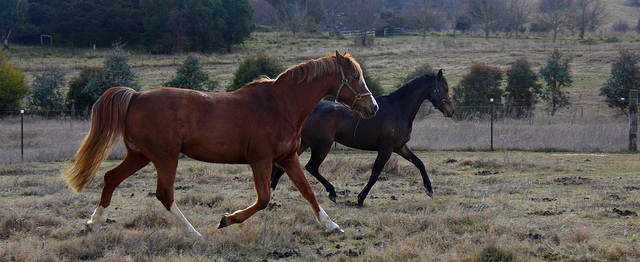

In [7]:
image

In [8]:
# base64 encode an image
def encode_image(image):
    buffered = io.BytesIO()
    image.save(buffered, format="JPEG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

In [9]:
def encode_images(images):
    return [encode_image(image) for image in images]

In [10]:
# decode the image from base64 encoding to image format
def decode_image(image):
    return Image.open(io.BytesIO(base64.b64decode(image)))

In [11]:
encoded_images = encode_images(load_images_from_folder(IMAGE_DIR_SMALL))

In [12]:
# select 3 images from the list
images = encoded_images

In [13]:
url = "http://127.0.0.1:5000/api/detect"
payload = json.dumps({"images": images})
headers = {"content-type": "application/json"}

In [14]:
def write_json_to_file(json: str, filename: str):
    with open(f'{filename}.json', "w") as file:
        file.write(json)

write_json_to_file(payload, "payload")

In [15]:
len(payload)

20238224

In [16]:
response = requests.post(url, data=payload, headers=headers)

In [19]:
response.json()

{'avg_inf_time': '0.1417434312201835',
 'avg_upload_time': '0.0004515132388553104',
 'bounding_boxes': [[{'class': 'Window',
    'score': 0.1128116175532341,
    'xmax': 574.246940612793,
    'xmin': 546.9961166381836,
    'ymax': 12.253011614084244,
    'ymin': 0.5378425754606724},
   {'class': 'Window',
    'score': 0.105120949447155,
    'xmax': 606.5135192871094,
    'xmin': 589.6222686767578,
    'ymax': 30.50828091800213,
    'ymin': 10.10002501308918},
   {'class': 'Window',
    'score': 0.10443272441625595,
    'xmax': 600.8134460449219,
    'xmin': 587.0699310302734,
    'ymax': 41.204626619815826,
    'ymin': 27.99432474374771},
   {'class': 'Window',
    'score': 0.09529826790094376,
    'xmax': 572.2557830810547,
    'xmin': 551.7413330078125,
    'ymax': 78.6197110414505,
    'ymin': 55.23757791519165},
   {'class': 'Window',
    'score': 0.09080341458320618,
    'xmax': 571.4046859741211,
    'xmin': 558.587760925293,
    'ymax': 38.89377170801163,
    'ymin': 27.34881234